In [ ]:
Abdelmoughith Lemkhentar
Bougerfaoui Ghassane
Mohamed Ali Belguermah
Abderrahmane Lazrek

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('disney.csv')
df.shape

(1450, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

count = count of non-null value
mean = average

In [8]:
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


ETAPE 2 : Analyse des données

some rows may contains multiple value separated with comma, so we used explode this is like exploding each list for each rows into other rows

In [10]:
df['listed_in'].str.split(', ').explode()

0              Animation
0                 Family
1                 Comedy
2              Animation
2                 Comedy
              ...       
1448              Comedy
1448       Coming of Age
1449    Action-Adventure
1449    Animals & Nature
1449           Animation
Name: listed_in, Length: 3910, dtype: object

Question 1 : Top 5 des meilleures catégories
In other words top 5 repeated categories

In [11]:
categories = df['listed_in'].str.split(', ').explode()
top_categories = categories.value_counts().head()
top_categories

listed_in
Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Name: count, dtype: int64

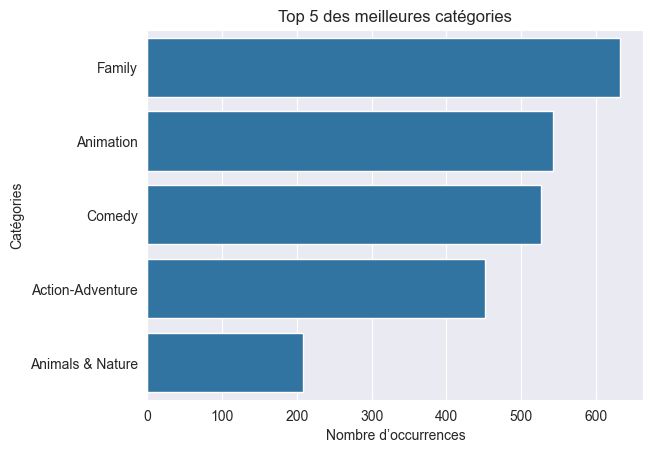

In [58]:
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 des meilleures catégories')
plt.xlabel('Nombre d’occurrences')
plt.ylabel('Catégories')
plt.show()

MAKING SURE

In [12]:
df['listed_in'].str.split(', ').explode().describe()['top']

'Family'

Question 2 : Top 5 des réalisateus

In [13]:
df['director'].str.split(', ').explode().dropna()

0       Alonso Ramirez Ramos
0                Dave Wasson
1                John Cherry
2               Karen Disher
3            Hamish Hamilton
                ...         
1445              Gavin Hood
1446              Shawn Levy
1447         Dexter Fletcher
1448         Gurinder Chadha
1449             Mark Waring
Name: director, Length: 1121, dtype: object

In [14]:
top_directors = df['director'].str.split(', ').explode().dropna().value_counts().head(5)
top_directors

director
Jack Hannah         17
John Lasseter       16
Wilfred Jackson     16
Paul Hoen           16
Robert Stevenson    13
Name: count, dtype: int64

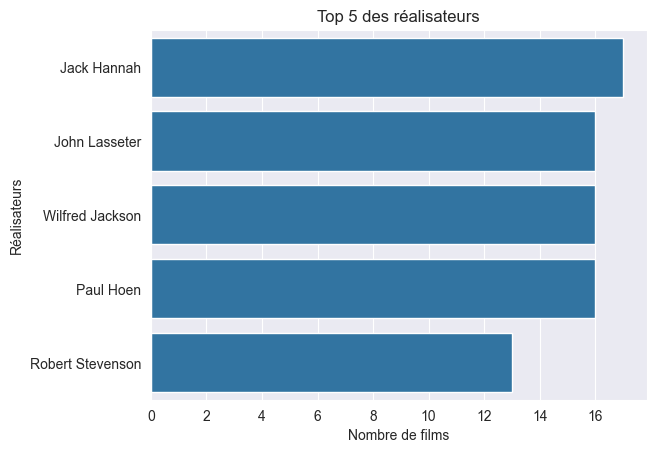

In [59]:
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 5 des réalisateurs')
plt.xlabel('Nombre de films')
plt.ylabel('Réalisateurs')
plt.show()

MAKING SURE

In [15]:
df['director'].str.split(', ').explode().describe()['top']

'Jack Hannah'

Question 3 : Les dix meilleurs acteurs

In [62]:
cast = df['cast'].str.split(', ').explode().dropna().value_counts().head(10)

In [17]:
cast.describe()

count     5.000000
mean     20.800000
std       6.978539
min      16.000000
25%      17.000000
50%      18.000000
75%      20.000000
max      33.000000
Name: count, dtype: float64

In [63]:
cast.head(10)

cast
Jim Cummings            33
Walt Disney             20
Bill Farmer             18
Larry the Cable Guy     17
Tress MacNeille         16
Corey Burton            16
Keith Ferguson          16
Pinto Colvig            15
Bob Peterson            15
Jeff Bennett            15
Name: count, dtype: int64

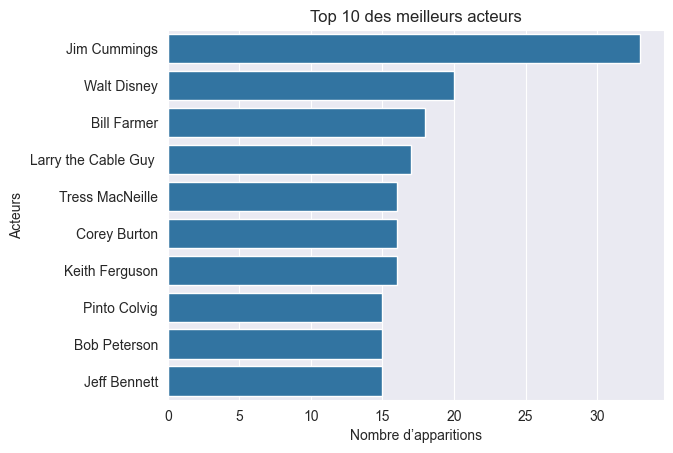

In [61]:
sns.barplot(x=cast.values, y=cast.index)
plt.title('Top 10 des meilleurs acteurs')
plt.xlabel('Nombre d’apparitions')
plt.ylabel('Acteurs')
plt.show()

MAKING SURE

In [19]:
df['cast'].str.split(', ').explode().describe()['top']

'Jim Cummings'

Question 4 : Les cinq meilleures séries télévisées avec le plus grand nombre de saisons

In [20]:
tv_shows = df[df['type'] == 'TV Show']
# tv_shows.sort_values(by='duration', ascending=False).head(5)['duration']

In [21]:
top_tv_show = tv_shows.sort_values(by='duration', ascending=False).head(5)
top_tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
553,s554,TV Show,America's Funniest Home Videos,NaN,Tom Bergeron,United States,"April 24, 2020",1989,TV-PG,9 Seasons,"Comedy, Family, Fantasy",Home videos compete for cash prizes. Program i...
125,s126,TV Show,Dr. K's Exotic Animal ER,NaN,"Dr. Susan Kelleher, Art Edmonds",NaN,"August 25, 2021",2014,TV-14,9 Seasons,"Animals & Nature, Docuseries, Family",Dedicated veterinarians treat a colorful array...
557,s558,TV Show,Brain Games,NaN,Neil Harris,United States,"April 17, 2020",2011,TV-G,8 Seasons,"Docuseries, Family, Game Show / Competition",Brain Games features games & experiments revea...
285,s286,TV Show,Car SOS,NaN,NaN,United Kingdom,"February 26, 2021",2012,TV-PG,8 Seasons,"Buddy, Comedy, Docuseries",Decaying classic cars are revived by two exper...
759,s760,TV Show,Boy Meets World,NaN,"Ben Savage, William Daniels, Betsy Randle, Wil...",United States,"November 12, 2019",1993,TV-PG,7 Seasons,"Comedy, Coming of Age, Family","Adolescent Cory Matthews grows up, and faces p..."


MAKING SURE

In [22]:
top_tv_show['duration']

553    9 Seasons
125    9 Seasons
557    8 Seasons
285    8 Seasons
759    7 Seasons
Name: duration, dtype: object

In [23]:
top_tv_show['duration'].describe()

count             5
unique            3
top       9 Seasons
freq              2
Name: duration, dtype: object

Question 6 : Netflix/Amazon/Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

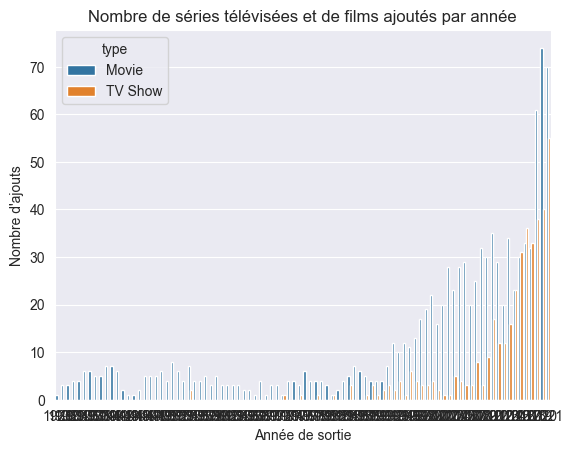

In [24]:
ax = sns.countplot(x='release_year', hue='type', data=df)
plt.title("Nombre de séries télévisées et de films ajoutés par année")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre d'ajouts")
plt.show()

In [25]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [32]:
movies_added_per_year = movies['release_year'].value_counts().sort_index(ascending=False)
tv_shows_added_per_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

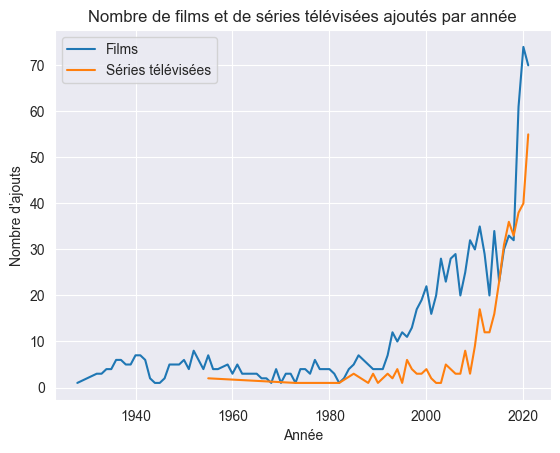

In [33]:
plt.plot(movies_added_per_year.index, movies_added_per_year.values, label='Films')
plt.plot(tv_shows_added_per_year.index, tv_shows_added_per_year.values, label='Séries télévisées')
plt.title("Nombre de films et de séries télévisées ajoutés par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'ajouts")
plt.legend()
plt.show()

Question 5 : Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

drop null

In [36]:
df_data_clean =df.dropna(subset=['description'])

instance vectoriseur TF-IDF

In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

Adapter le vectoriseur aux données de description

In [45]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_data_clean['description'])

Calculer les similarités cosinus entre les descriptions

In [47]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Sélectionner un contenu pour lequel vous voulez trouver des contenus similaires

In [56]:
content_index = 0

les scores de similarité pour le contenu sélectionné

In [57]:
similarities = list(enumerate(cosine_sim[content_index]))

In [59]:
similarities_sorted = sorted(similarities, key=lambda x: x[1], reverse=True)

In [61]:
similar_content_indices = [index for index, score in similarities_sorted[1:10]]

[1073, 385, 1378, 1023, 934, 1076, 741, 791, 1155]

In [63]:
similar_content = df_data_clean.iloc[similar_content_indices]['title']
print("Contenus similaires pour '{}': \n{}".format(df_data_clean.iloc[content_index]['title'], similar_content))

Contenus similaires pour 'Duck the Halls: A Mickey Mouse Christmas Special': 
1073           Mickey's Birthday Party
385               Toy Story of Terror!
1378                       Toy Story 2
1023                   Lonesome Ghosts
934                   Hawaiian Holiday
1076    Mickey's Once Upon a Christmas
741                       Beach Picnic
791                      Chip an' Dale
1155           Recess: All Growed Down
Name: title, dtype: object


Question 7 : Distribution des types de contenu sur Disney

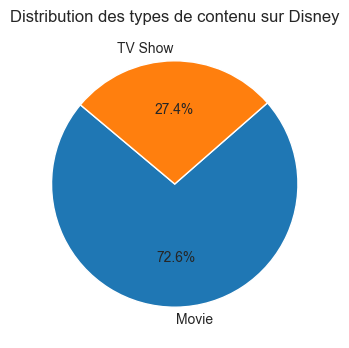

In [64]:
# Count the occurrences of each content type
content_type_counts = df['type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des types de contenu sur Disney')
plt.show()

Question 8: Distribution des sorties de films Disney par année

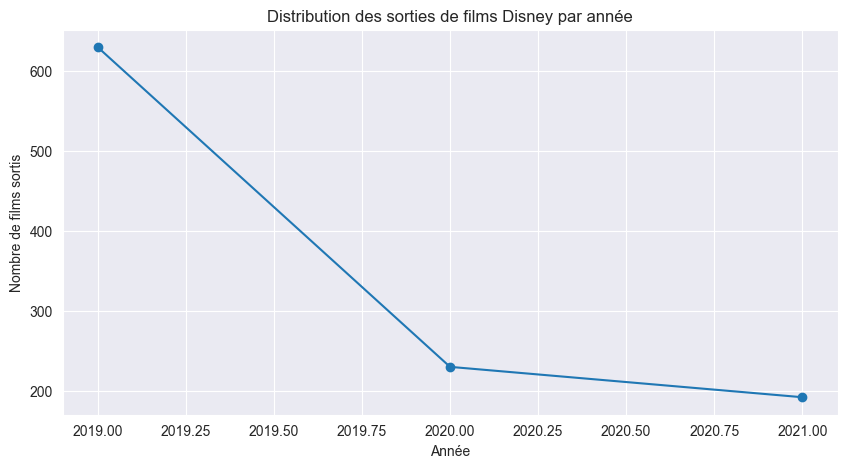

In [66]:
# Créer une nouvelle colonne pour les années de sortie
df['release_year'] = pd.to_datetime(df['date_added']).dt.year

# Compter le nombre de films sortis chaque année
releases_per_year = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()

# Tracer un graphique en ligne
plt.figure(figsize=(10, 5))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o', linestyle='-')
plt.title('Distribution des sorties de films Disney par année')
plt.xlabel('Année')
plt.ylabel('Nombre de films sortis')
plt.grid(True)
plt.show()

Question 9: Quelle est la distribution des années de sortie des contenus?

In [93]:
df_country = df['country'].dropna().str.split(',').explode().value_counts()
df_country = df['country'].dropna().str.split(',').explode().str.strip()

2        United States
5        United States
7        United States
8        United States
9        United States
             ...      
1447     United States
1448    United Kingdom
1448           Germany
1448     United States
1449     United States
Name: country, Length: 1528, dtype: object

In [97]:
# Count occurrences of each country
country_counts = df_country.value_counts().reset_index()
# Rename the columns for clarity
country_counts.columns = ['country', 'count']
country_counts

,country,count
0,United States,1184
1,United Kingdom,101
2,Canada,77
3,Australia,23
4,France,22
5,South Korea,13
6,China,10
7,Japan,10
8,Germany,9
9,Ireland,8


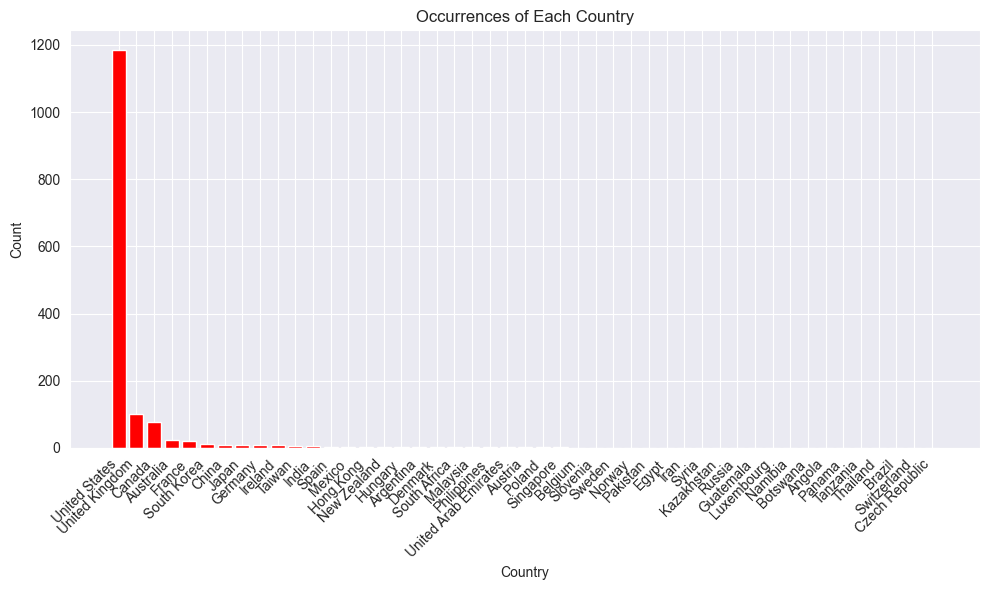

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(country_counts['country'], country_counts['count'], color='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Occurrences of Each Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 10: Y a-t-il une tendance temporelle dans l'ajout de nouveaux contenus?

C:\Users\MON PC\AppData\Local\Temp\ipykernel_3772\2902842148.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  contents_per_month = df_data_clean.set_index('date_added').resample('M').size()


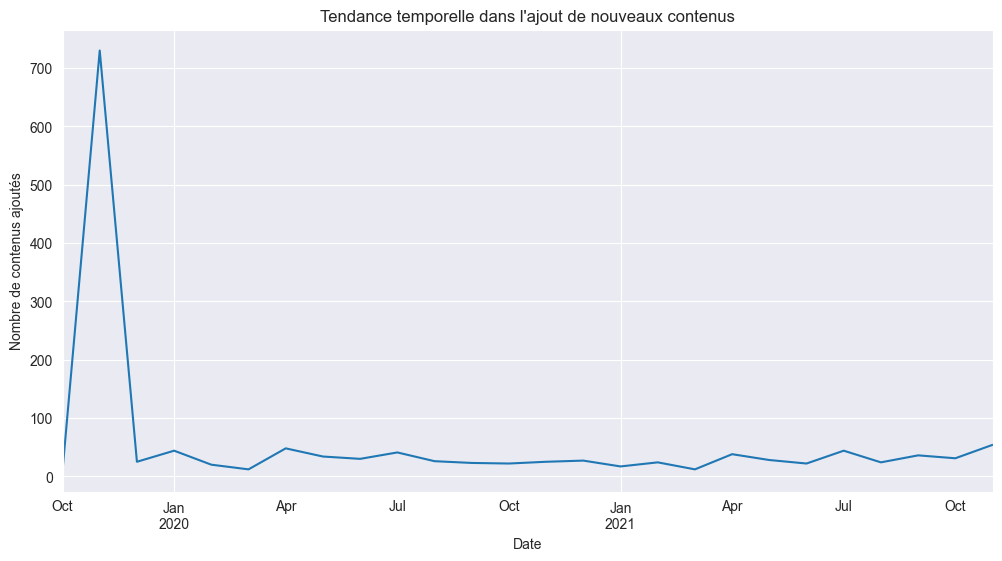

In [108]:

df_data_clean['date_added'] = pd.to_datetime(df_data_clean['date_added'])

contents_per_month = df_data_clean.set_index('date_added').resample('M').size()

# Visualiser la tendance temporelle
plt.figure(figsize=(12, 6))
contents_per_month.plot()
plt.title('Tendance temporelle dans l\'ajout de nouveaux contenus')
plt.xlabel('Date')
plt.ylabel('Nombre de contenus ajoutés')
plt.show()
